In [135]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [538]:
import os

os.chdir("..")

In [539]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from main import invariant_distribution, invariant_distribution_analytically

**Plots**

In [88]:
b, c = 1, .7

In [89]:
def calculate_verts(b, c):    
    p = 1 - c / b

    points = [(0, 1, p), (p, 1, p), (1, p, p), (1, 0, p), (0, 0, p),
             ]

    dpoints = [(0, 1, p),
               (0, 1, 0),
               (p, 1, 0),
               (1, p, 0),
               (1, 0, 0),
               (0, 0, 0),
               (0, 0, p)]

    ipoints = [(0, 1, p), (p, 1, p), (1, p, p),
               (1, p, 0), (p, 1, 0), (0, 1, 0)]

    dline = [(p, 1, p), (p, 1, 0)]

    dline2 = [(1, 0, p), (1, 0, 0)]

    dline3 = [(0, 0, 0), (0, 1, 0)]

    verts = [np.array([np.array(point) for point in points]),
             np.array([np.array(point) for point in dpoints]),
             np.array([np.array(point) for point in ipoints]),
             np.array([np.array(point) for point in dline]),
             np.array([np.array(point) for point in dline2]),
             np.array([np.array(point) for point in dline3])]
    
    return verts

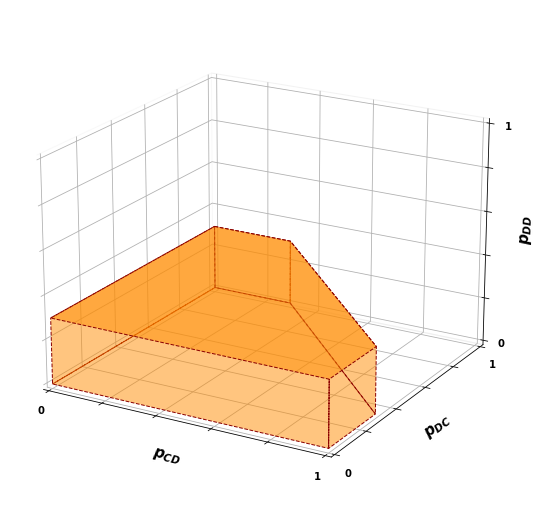

In [69]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(121, projection='3d')

axes = [ax1]


ax1.add_collection3d(Poly3DCollection(verts, facecolors="darkorange",
                                     alpha=0.5,
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='darkred',));

ax1.view_init(20, -60)


for ax in axes:
    
    ax.set_xlim(0, 1);
    ax.set_ylim(0, 1);
    ax.set_zlim(0, 1);
    
    ax.set_xlabel("$p_{CD}$", fontsize=15)
    ax.set_ylabel("$p_{DC}$", fontsize=15)
    ax.set_zlabel("$p_{DD}$", fontsize=15)

    ax.set_xticklabels([0, "", "", "", "", 1])
    ax.set_yticklabels([0, "", "", "", "", 1])
    ax.set_zticklabels([0, "", "", "", "", 1])
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

**data**

In [618]:
def get_df_and_good(c, good_thres=.95):
    
    names = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]
    
    evol = pd.read_csv(f"data/matlab_data/bits_4_beta_1_seed_1_c_{c}.csv", names=names)
    
    evol = evol.drop_duplicates()
    
    times = evol['t'].values

    frequencies = []

    for i, time in enumerate(times):
        if i == 0:
            pass
        else:
            frequencies.append(time - times[i - 1])
    frequencies.append(10 ** 7 - times[-1])
    frequencies = np.array(frequencies)
    evol['freq'] = frequencies
    
    return evol, evol[evol['p_1'] >= good_thres]

In [619]:
evol, good = get_df_and_good(c, good_thres=.95)

In [620]:
verts = calculate_verts(1, .2)

In [621]:
to_plot = good.sort_values('freq')[-500:][['p_2', 'p_3', 'p_4', 'freq']].values

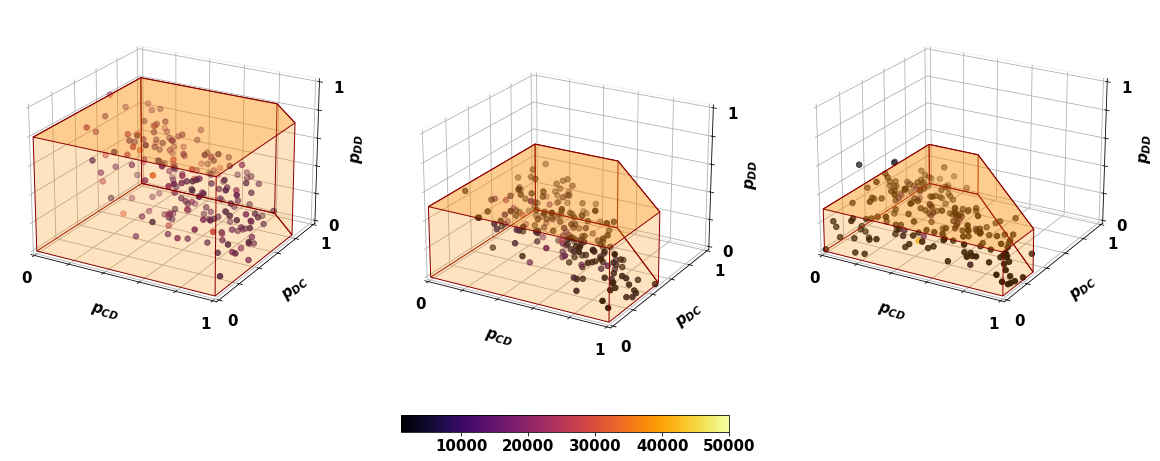

In [622]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(131, projection='3d')

ax2 = fig.add_subplot(132, projection='3d')

ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax, c in zip(axes, [.2, .5, .7]):
    
    evol, good = get_df_and_good(c, good_thres=.95)
    
    verts = calculate_verts(1, c)
    
    to_plot = good.sort_values('freq')[-200:][['p_2', 'p_3', 'p_4', 'freq']].values


    ax.add_collection3d(Poly3DCollection(verts, facecolors="darkorange",
                                         alpha=0.25,
                                         linewidths=1,
                                         linestyle='-',
                                         edgecolors='darkred',));

    sc = ax.scatter(to_plot[:, 0],
                to_plot[:, 1],
                to_plot[:, 2],
                c=to_plot[:, 3],
                s=30,
                vmin=1000,
                vmax=50000,
                cmap='inferno',
                );
    
    if c == .5:
        cb = fig.colorbar(sc, ax=ax2, orientation='horizontal', fraction=0.050, pad=0.10)
        
for ax in axes:
    
    ax.view_init(22, -60)
    
    ax.set_xlim(0, 1);
    ax.set_ylim(0, 1);
    ax.set_zlim(0, 1);
    
    ax.set_xlabel("$p_{CD}$", fontsize=15)
    ax.set_ylabel("$p_{DC}$", fontsize=15)
    ax.set_zlabel("$p_{DD}$", fontsize=15)

    ax.set_xticklabels([0, "", "", "", "", 1])
    ax.set_yticklabels([0, "", "", "", "", 1])
    ax.set_zticklabels([0, "", "", "", "", 1])
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    
fig.tight_layout();

### Invasion

In [658]:
c = .2

evol, good = get_df_and_good(c, good_thres=.95)

In [659]:
sort = good.sort_values('p_4')

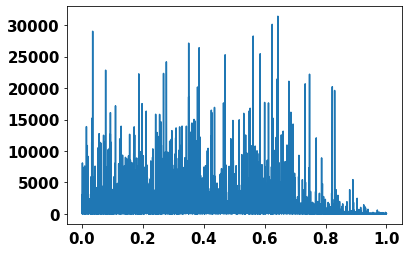

In [660]:
plt.plot(sort['p_4'], sort['freq']);

### Planes to draw

In [624]:
c = .5

p = 1 - c

In [644]:
x1 = np.linspace(0, 1, 50)

y = np.linspace(0, p, 50)

xx2, yy2 = np.meshgrid(x1, y)

z2 =  1 / 2 * xx2  + 0

x = np.linspace(0, p + .042, 50)

xx1, yy1 = np.meshgrid(x, y)

z =   2 * xx1 ** 1.2 + 0

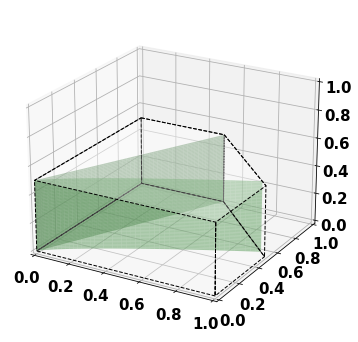

In [645]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(131, projection='3d')

verts = calculate_verts(1, c)
    
    
ax.add_collection3d(Poly3DCollection(verts, facecolors="w",
                                     alpha=0.25,
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='black',));

ax.plot_surface(z, xx1, yy1, alpha=0.5, color="tab:green");

ax.plot_surface(z2, xx2, yy2, alpha=0.5, color="tab:green");

ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.set_zlim(0, 1);

ax.view_init(22, -60)

In [646]:
xx1.shape

(50, 50)

In [647]:
coops = np.zeros((50, 50))

for irow, row in enumerate(xx1):
    for icol, p3v in enumerate(row):
        
        p4v = yy1[irow, icol]
        
        p2v = 1 / 2 * p3v
        
        player = [.95, p2v, .95, p2v, p3v, p4v, p3v, p4v] * 2
        
        M = main.calculate_M(player, player, analytical=False)
        
        ss = invariant_distribution(M)
        
        coops[irow, icol] = ss[0] + ss[1]

In [648]:
coops2 = np.zeros((50, 50))

for irow, row in enumerate(xx2):
    for icol, p3v in enumerate(row):
        
        p4v = yy2[irow, icol]
        
        p2v = 1 / 2 * p3v
        
        player = [.9, p2v, .9, p2v, p3v, p4v, p3v, p4v] * 2
        
        M = main.calculate_M(player, player, analytical=False)
        
        ss = invariant_distribution(M)
        
        coops2[irow, icol] = ss[0] + ss[1]

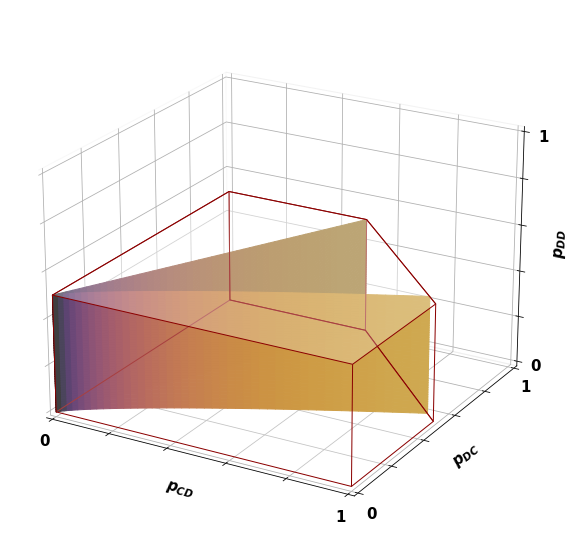

In [649]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111, projection='3d')

verts = calculate_verts(1, c)
    
    
ax.add_collection3d(Poly3DCollection(verts, facecolors="w",
                                     alpha=0.25,
                                     linewidths=1,
                                     linestyle='-',
                                     edgecolors='darkred',));

ax.plot_surface(z, xx1, yy1,
                facecolors = cm.inferno(coops), rstride=1, cstride=1,
                )

ax.plot_surface(z2, xx2, yy2,
                facecolors = cm.inferno(coops2), rstride=1, cstride=1,);

ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.set_zlim(0, 1);

ax.set_xlabel("$p_{CD}$", fontsize=15)
ax.set_ylabel("$p_{DC}$", fontsize=15)
ax.set_zlabel("$p_{DD}$", fontsize=15)

ax.set_xticklabels([0, "", "", "", "", 1])
ax.set_yticklabels([0, "", "", "", "", 1])
ax.set_zticklabels([0, "", "", "", "", 1])

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
    
    
ax.view_init(22, -60)

In [560]:
ss

array([1., 0., 0., 0.])